In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ticktack
from jax import jit
import jax.numpy as jnp
from ticktack import fitting, resample
from scipy.interpolate import interp1d
plt.rcParams['figure.figsize'] = (8.0, 6.0)
#from helper import run_resample, load_IntCal20
import pandas as pd
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d

In [3]:
data = pd.read_csv("../data/Miyahara.csv")

<ErrorbarContainer object of 3 artists>

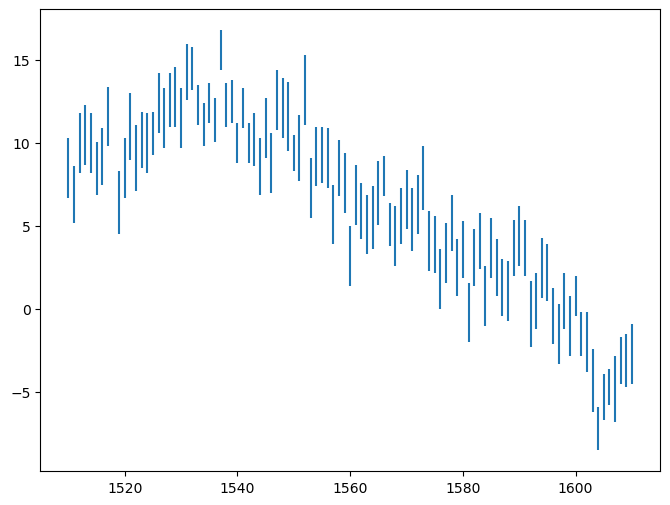

In [4]:
plt.errorbar(data.year, data.d14c, yerr=data.sig_d14c, linestyle='None')

In [5]:
resampler = resample.Resampler()
resampler.load_data(data.year, data.d14c, data.sig_d14c)
resampler.annual = np.arange(np.ceil(resampler.start), np.floor(resampler.end + 1))
new_signal = resampler.signal_resample()

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [6]:
f = interp1d(resampler.x, resampler.y, kind="cubic")
interpolation = f(resampler.annual)
sig = resampler.bandpass_super_gaussian(interpolation, l=1./9.677, sz=0.05, order=30)

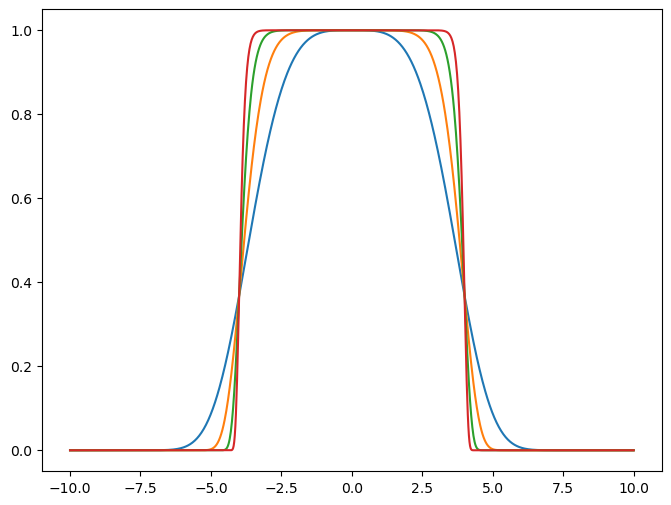

In [7]:
xx = np.linspace(-10,10,1000)

for order in [4, 8, 16, 32]:
    yy = resampler.super_gaussian(xx,sz=4,order=order)
    plt.plot(xx,yy)

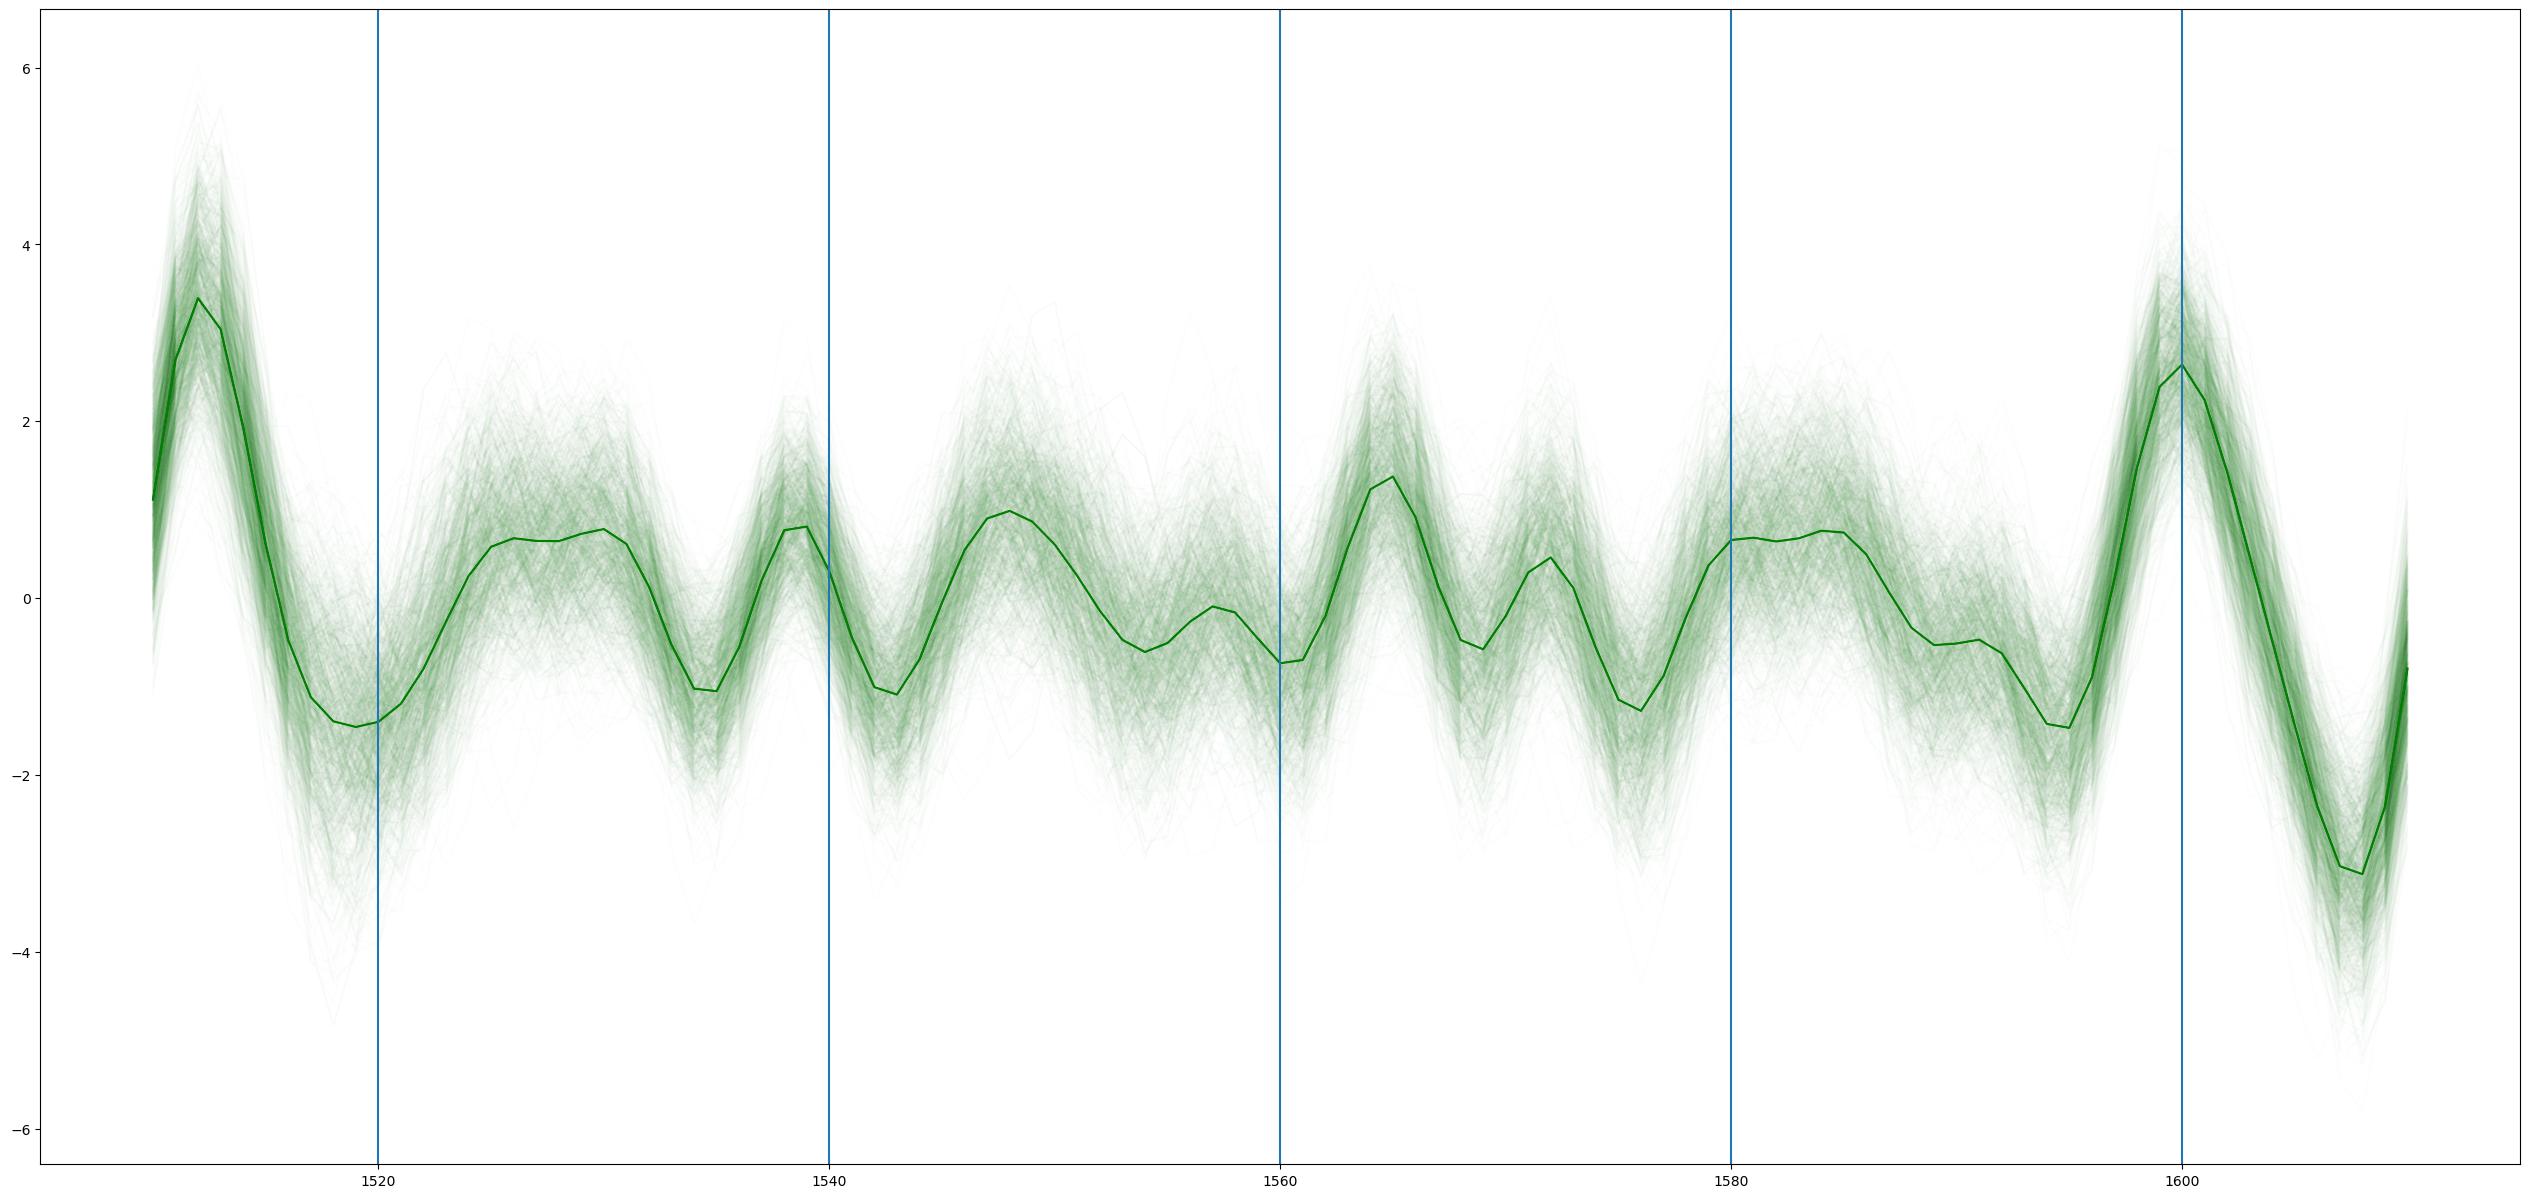

In [8]:
fig, axs = plt.subplots(1, figsize=(32, 15), sharex=True)
axs.plot(resampler.annual, sig, color="g")
for i in np.random.randint(10000, size=1000):
    axs.plot(resampler.annual, new_signal[i, :], color="g", alpha=0.01)
axs.axvline(1520)
axs.axvline(1540)
axs.axvline(1560)
axs.axvline(1580)
axs.axvline(1600)

[[-0.43065559  2.05007388  3.87394085 ... -3.46830744 -3.64224293
  -2.57433178]
 [ 0.13392567  2.08154231  3.70788612 ... -3.27605651 -2.76646108
  -1.59445101]
 [ 1.41390426  2.51091292  2.85291374 ... -2.38703085 -1.51028147
  -0.10068169]
 ...
 [-0.19102563  2.06351207  3.75837502 ... -3.52018158 -3.35614895
  -2.19949191]
 [ 1.79568418  3.35220531  3.89942027 ... -3.77121059 -2.46325656
  -0.37872913]
 [-0.12153952  1.73989488  2.71557797 ... -2.74400912 -2.93574215
  -1.9692344 ]]


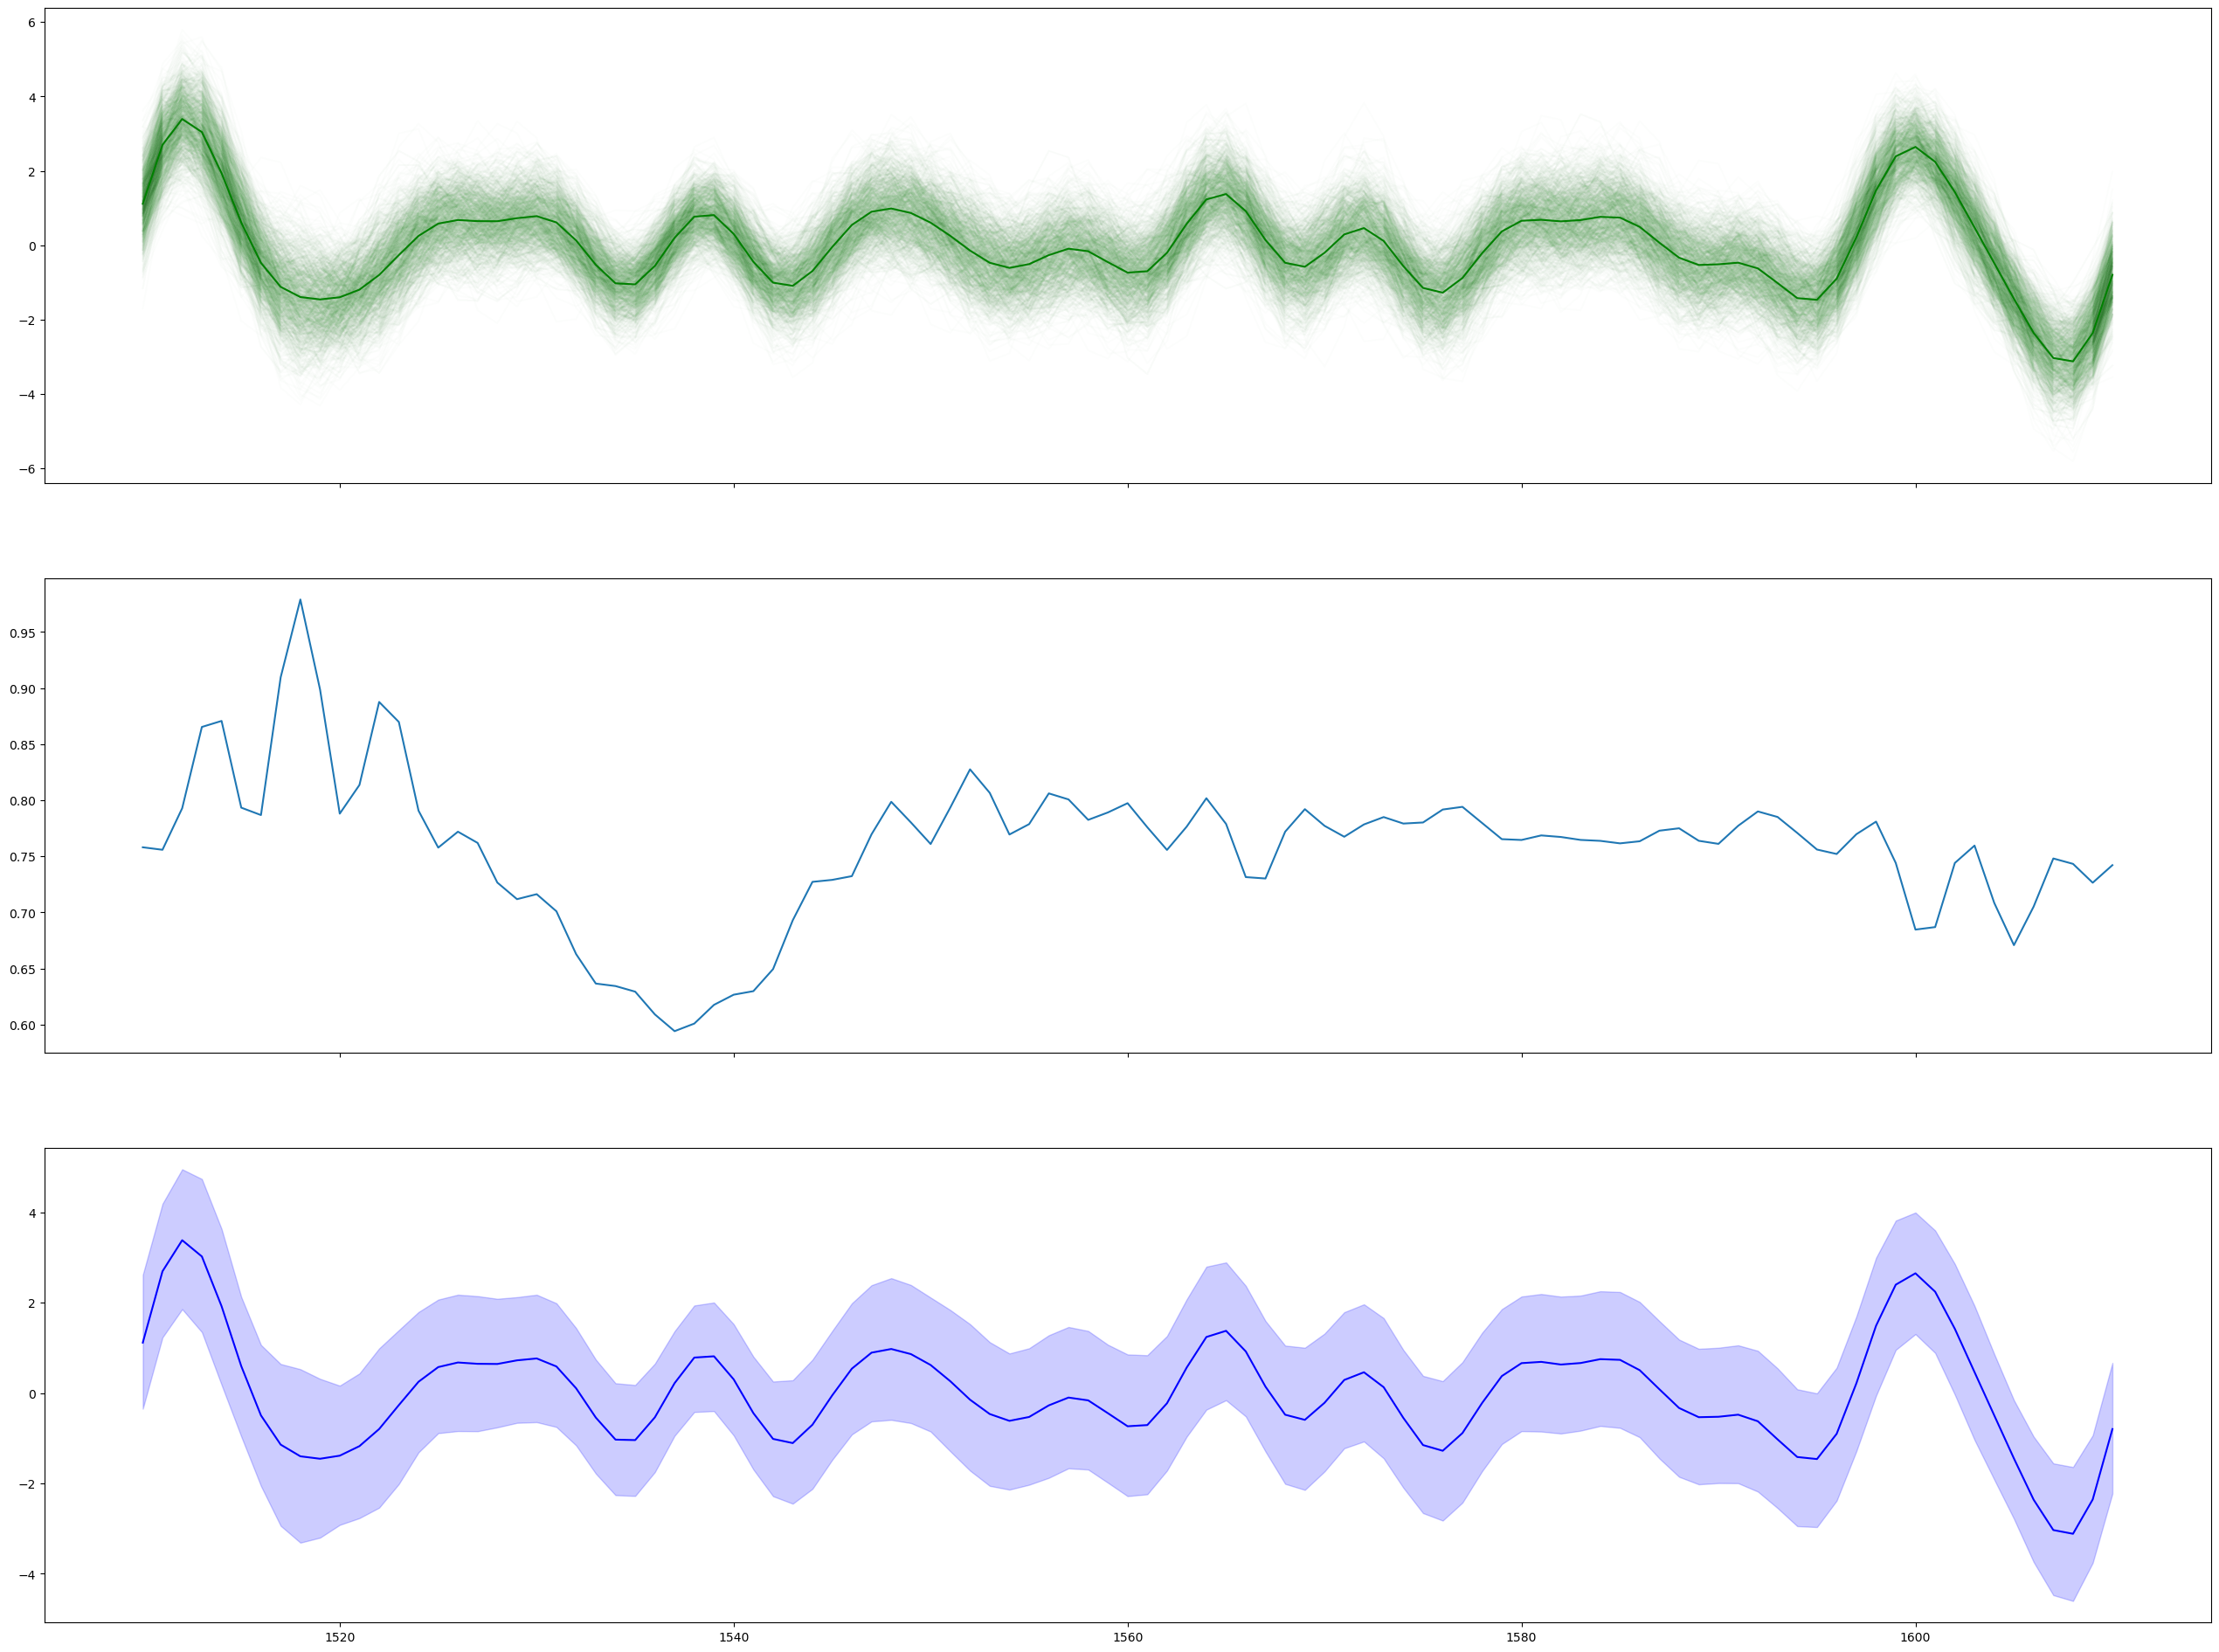

In [9]:
fig, axs = plt.subplots(3, figsize=(32, 24), sharex=True)
for i in np.random.randint(10000, size=1000):
    axs[0].plot(resampler.annual, new_signal[i, :], color="g", alpha=0.01)
axs[0].plot(resampler.annual, sig, color="g")
axs[1].plot(resampler.annual, np.std(new_signal, axis=0))
l, m, u = np.percentile(new_signal, (2.5, 50, 97.5 ), axis=0)
axs[2].fill_between(resampler.annual, l, u, color = 'b', alpha=0.2)
axs[2].plot(resampler.annual, m, color = 'b')
print(new_signal)

In [ ]:
vec1_sum=0
vec2_sum=0
cumulative_dot=0
counter=1
#full_cossim_list=np.zeros(len(new_signal))
for v in range(len(new_signal)):
    for q in range(v+1,len(new_signal)):
        counter+=1
        for i in range(len(new_signal[1])):    
            vec1_sum+=(float(new_signal[v,i]))**2
            vec2_sum+=(float(new_signal[q,i]))**2
            cumulative_dot+=float(new_signal[v,i])*float(new_signal[q,i])
        vec1=np.sqrt(vec1_sum)
        vec2=np.sqrt(vec2_sum)
        cossim=cumulative_dot/(vec1*vec2)
print(counter)

KeyboardInterrupt: 